<a href="https://colab.research.google.com/github/Nasir-AhmadZ/Driver-Analysis-ML-Model/blob/NONE-61-ResNet-Deep-learning-residual-network/Driver_Behaviour.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Goal: Train a model on this dataset
https://www.kaggle.com/code/imtkaggleteam/driver-behavior-detection-cnn


Importing Libraries

In [2]:
import warnings
warnings.filterwarnings("ignore")
from numpy import asarray
import numpy as np
import pandas as pd
from PIL import Image
import cv2
import glob
import os
import random
import subprocess
import matplotlib.pyplot as plt
from skimage.io import imread
from matplotlib.patches import Rectangle
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models, Input, Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Importing dataset

In [3]:
labels=[]
folddir="/content/drive/MyDrive/Revitsone-5classes"
folders=os.listdir(folddir)
for fold in folders:
    labels.append(fold)
    foldpath=os.path.join(folddir,fold)
    print(foldpath)

/content/drive/MyDrive/Revitsone-5classes/turning
/content/drive/MyDrive/Revitsone-5classes/safe_driving
/content/drive/MyDrive/Revitsone-5classes/talking_phone
/content/drive/MyDrive/Revitsone-5classes/texting_phone
/content/drive/MyDrive/Revitsone-5classes/other_activities


In [4]:
labels

['turning',
 'safe_driving',
 'talking_phone',
 'texting_phone',
 'other_activities']

In [5]:
#Appends all the images in other activities folder to this array other_activities
other_activities = []
for otherImg in os.listdir("/content/drive/MyDrive/Revitsone-5classes/other_activities"):
  if otherImg.endswith(".png") or otherImg.endswith(".jpg"):
    other_activities.append(os.path.join("/content/drive/MyDrive/Revitsone-5classes/other_activities",otherImg))

#Appends all the images in safe driving folder to this array safe_driving
safe_driving = []
for safeImg in os.listdir("/content/drive/MyDrive/Revitsone-5classes/safe_driving"):
  if safeImg.endswith(".png") or safeImg.endswith(".jpg"):
    safe_driving.append(os.path.join("/content/drive/MyDrive/Revitsone-5classes/safe_driving",safeImg))

#Append all the images in talking phone to this array talking_phone
talking_phone = []
for talkingImg in os.listdir("/content/drive/MyDrive/Revitsone-5classes/talking_phone"):
  if talkingImg.endswith(".png") or talkingImg.endswith(".jpg"):
    talking_phone.append(os.path.join("/content/drive/MyDrive/Revitsone-5classes/talking_phone",talkingImg))

#Append all the images in texting phone to this array texting_phone
texting_phone = []
for textingImg in os.listdir("/content/drive/MyDrive/Revitsone-5classes/texting_phone"):
  if textingImg.endswith(".png") or textingImg.endswith(".jpg"):
    texting_phone.append(os.path.join("/content/drive/MyDrive/Revitsone-5classes/texting_phone",textingImg))

#Append all the images in turning folder to this array turning
turning = []
for turningImg in os.listdir("/content/drive/MyDrive/Revitsone-5classes/turning"):
  if turningImg.endswith(".png") or turningImg.endswith(".jpg"):
    turning.append(os.path.join("/content/drive/MyDrive/Revitsone-5classes/turning",turningImg))

In [6]:
print(texting_phone[0],"\n" ,talking_phone[0],"\n", turning[0],"\n", safe_driving[0],"\n", other_activities[0])

/content/drive/MyDrive/Revitsone-5classes/texting_phone/img_32870.jpg 
 /content/drive/MyDrive/Revitsone-5classes/talking_phone/img_32056.jpg 
 /content/drive/MyDrive/Revitsone-5classes/turning/img_58779.jpg 
 /content/drive/MyDrive/Revitsone-5classes/safe_driving/img_50792.jpg 
 /content/drive/MyDrive/Revitsone-5classes/other_activities/img_21192.jpg


In [ ]:
!pip install pytesseract

Removing unread images

In [ ]:

import os
from PIL import Image, ImageStat
import pytesseract  # optional (for OCR check)

def is_image_readable(image_path):
    """Check if image can be opened and is not corrupted."""
    try:
        with Image.open(image_path) as img:
            img.verify()  # verifies integrity
        return True
    except Exception as e:
        print(f"[Corrupted] {image_path}: {e}")
        return False

def is_image_blank(image_path, threshold=5):
    """Check if image is nearly blank (little variation in pixels)."""
    try:
        with Image.open(image_path) as img:
            img = img.convert("L")  # grayscale
            stat = ImageStat.Stat(img)
            return stat.stddev[0] < threshold
    except Exception as e:
        print(f"[Error reading] {image_path}: {e}")
        return True

def has_text(image_path, min_chars=10):
    """Check if image contains some readable text (optional OCR check)."""
    try:
        text = pytesseract.image_to_string(Image.open(image_path))
        return len(text.strip()) >= min_chars
    except Exception as e:
        print(f"[OCR error] {image_path}: {e}")
        return False

def analyze_folder(folder_path, use_ocr=False):
    """Iterate through all images in folder and check readability."""
    readable_images = []
    unreadable_images = []

    for filename in os.listdir(folder_path):
        if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff', '.webp')):
            path = os.path.join(folder_path, filename)
            if is_image_readable(path) and not is_image_blank(path):
                if use_ocr:
                    if has_text(path):
                        readable_images.append(filename)
                    else:
                        unreadable_images.append(filename)
                        os.remove(os.path.join(folder_path, filename))
                else:
                    readable_images.append(filename)
            else:
                unreadable_images.append(filename)
                os.remove(os.path.join(folder_path, filename))

    return readable_images, unreadable_images


# Example usage
if __name__ == "__main__":
    folder = "/content/drive/MyDrive/Revitsone-5classes/other_activities"
    readable, unreadable = analyze_folder(folder, use_ocr=False)

    print("\n✅ Readable images:")
    for img in readable:
        print(" -", img)

    print("\n❌ Unreadable or blank images:")
    for img in unreadable:
        print(" -", img)



✅ Readable images:
 - img_20896.jpg
 - img_20968.jpg
 - img_21113.jpg
 - img_20722.jpg
 - img_20305.jpg
 - img_21503.jpg
 - img_2150.jpg
 - img_21790.jpg
 - img_21902.jpg
 - img_20392.jpg
 - img_20396.jpg
 - img_20624.jpg
 - img_20315.jpg
 - img_20354.jpg
 - img_21175.jpg
 - img_20951.jpg
 - img_20676.jpg
 - img_21168.jpg
 - img_20728.jpg
 - img_21977.jpg
 - img_212.jpg
 - img_21274.jpg
 - img_20461.jpg
 - img_21829.jpg
 - img_21957.jpg
 - img_21897.jpg
 - img_20688.jpg
 - img_21749.jpg
 - img_21654.jpg
 - img_20960.jpg
 - img_20458.jpg
 - img_21500.jpg
 - img_21153.jpg
 - img_20620.jpg
 - img_21350.jpg
 - img_21051.jpg
 - img_21871.jpg
 - img_21954.jpg
 - img_20928.jpg
 - img_21310.jpg
 - img_20537.jpg
 - img_20708.jpg
 - img_21546.jpg
 - img_2373.jpg
 - img_22687.jpg
 - img_24046.jpg
 - img_22967.jpg
 - img_23948.jpg
 - img_24749.jpg
 - img_2198.jpg
 - img_22684.jpg
 - img_23688.jpg
 - img_22614.jpg
 - img_2369.jpg
 - img_2410.jpg
 - img_22999.jpg
 - img_24040.jpg
 - img_24529.jpg
 

In [ ]:
if __name__ == "__main__":
    folder = "/content/drive/MyDrive/Revitsone-5classes/turning"
    readable, unreadable = analyze_folder(folder, use_ocr=False)

    print("\n✅ Readable images:")
    for img in readable:
        print(" -", img)

    print("\n❌ Unreadable or blank images:")
    for img in unreadable:
        print(" -", img)

[Corrupted] /content/drive/MyDrive/Revitsone-5classes/turning/img_62337.jpg: cannot identify image file '/content/drive/MyDrive/Revitsone-5classes/turning/img_62337.jpg'
[Corrupted] /content/drive/MyDrive/Revitsone-5classes/turning/img_67523.jpg: cannot identify image file '/content/drive/MyDrive/Revitsone-5classes/turning/img_67523.jpg'
[Corrupted] /content/drive/MyDrive/Revitsone-5classes/turning/img_70552.jpg: cannot identify image file '/content/drive/MyDrive/Revitsone-5classes/turning/img_70552.jpg'
[Corrupted] /content/drive/MyDrive/Revitsone-5classes/turning/img_84605.jpg: cannot identify image file '/content/drive/MyDrive/Revitsone-5classes/turning/img_84605.jpg'
[Corrupted] /content/drive/MyDrive/Revitsone-5classes/turning/img_8771.jpg: cannot identify image file '/content/drive/MyDrive/Revitsone-5classes/turning/img_8771.jpg'
[Corrupted] /content/drive/MyDrive/Revitsone-5classes/turning/img_101434.jpg: cannot identify image file '/content/drive/MyDrive/Revitsone-5classes/turn

In [7]:
font = {'family':'Times New Roman','color':'#1f211f'}
background_color = '#fab72f'

## Testing if datasets work

Random images of people talking on the phone

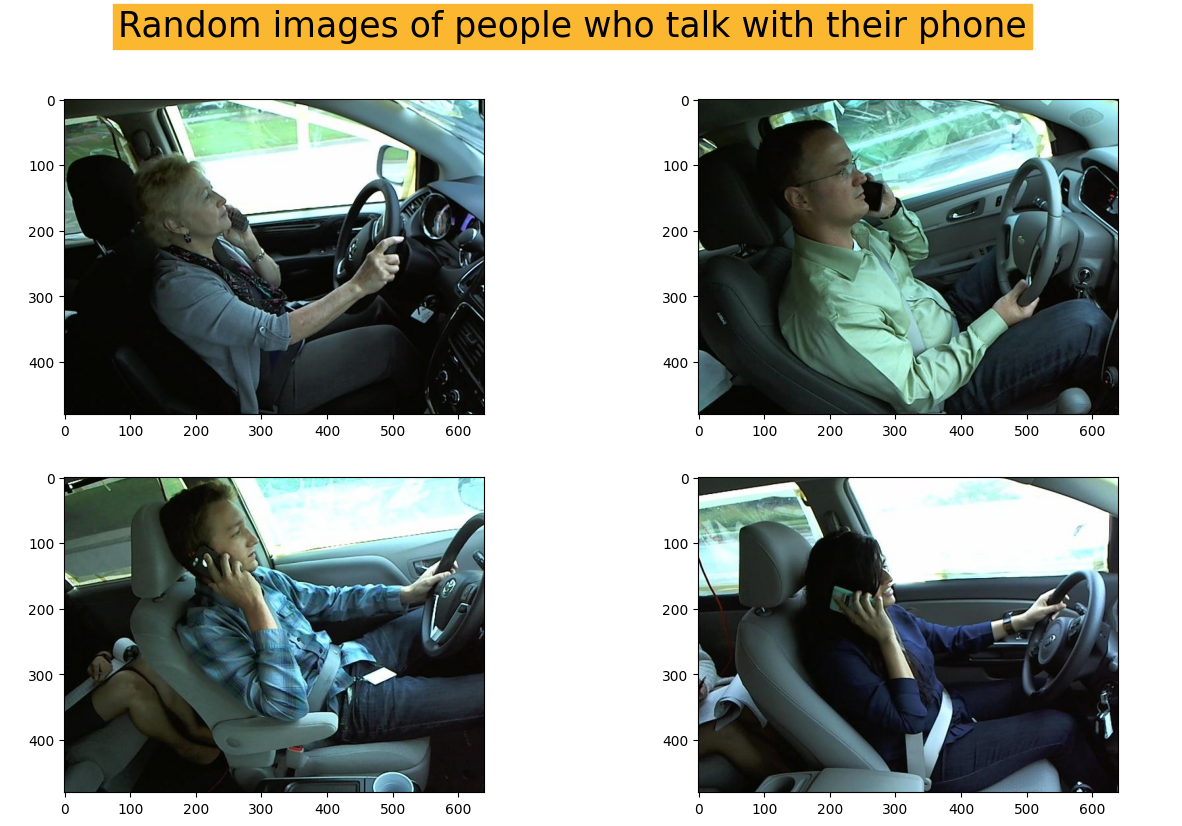

In [8]:
plt.figure(1, figsize=(15, 9))
plt.axis('off')
n = 0
for i in range(4):

    n += 1
    random_img = random.choice(talking_phone)
    imgs = imread(random_img)
    plt.suptitle("Random images of people who talk with their phone", fontsize=25
                 ,backgroundcolor= background_color)
    plt.subplot(2,2,n)
    plt.imshow(imgs)

plt.show()

Random images of people texting on the phone

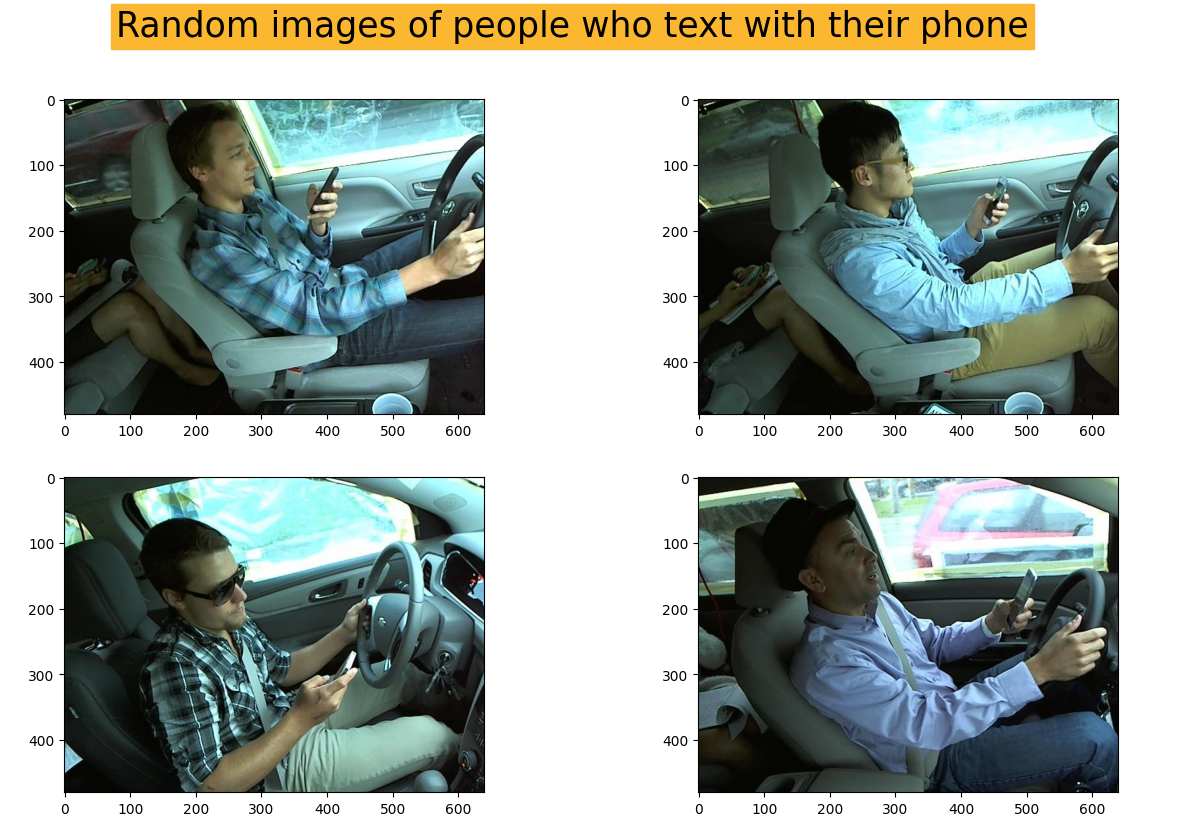

In [ ]:
plt.figure(1, figsize=(15, 9))
plt.axis('off')
n = 0
for i in range(4):

    n += 1
    random_img = random.choice(texting_phone)
    imgs = imread(random_img)
    plt.suptitle("Random images of people who text with their phone", fontsize=25
                 ,backgroundcolor= background_color)
    plt.subplot(2,2,n)
    plt.imshow(imgs)

plt.show()

Random images of people turning

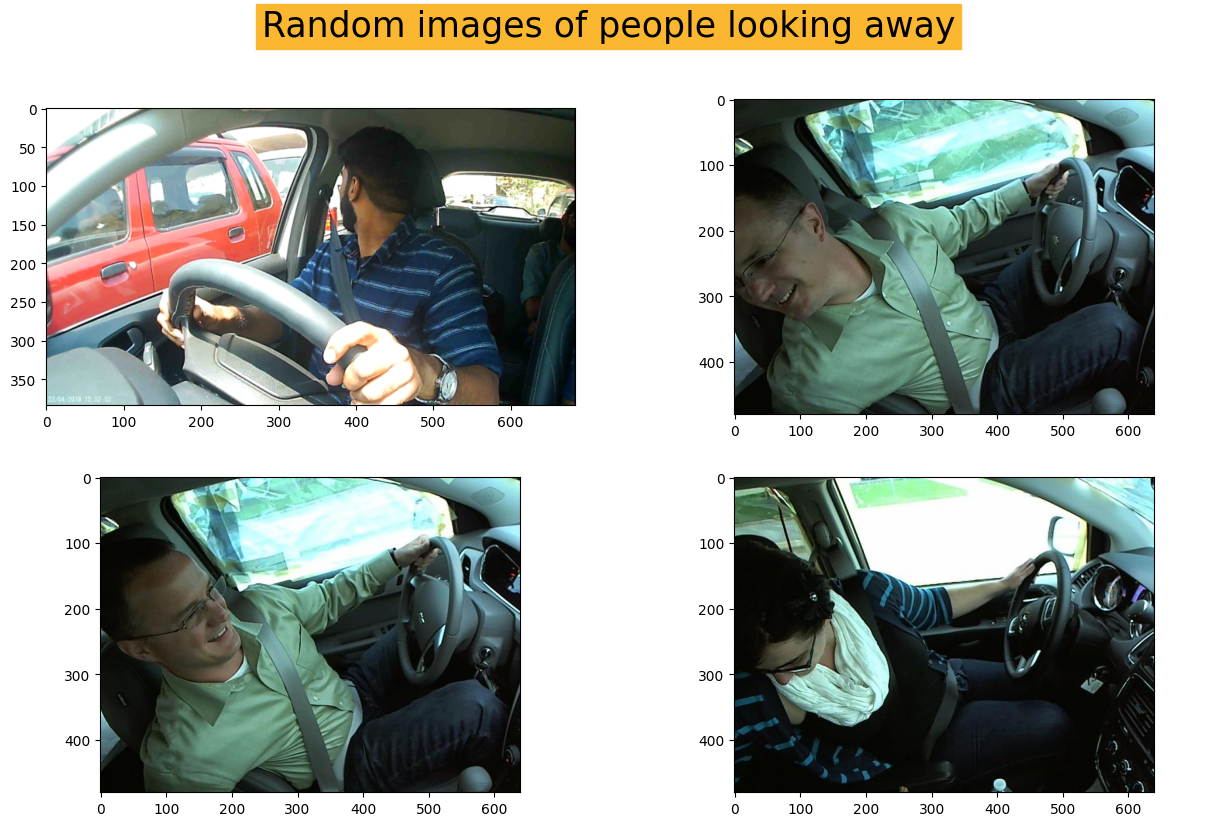

In [ ]:
plt.figure(1, figsize=(15, 9))
plt.axis('off')
n = 0
for i in range(4):

    n += 1
    random_img = random.choice(turning)
    imgs = imread(random_img)
    plt.suptitle("Random images of people looking away", fontsize=25
                 ,backgroundcolor= background_color)
    plt.subplot(2,2,n)
    plt.imshow(imgs)

plt.show()

images of other unsafe activities while driving

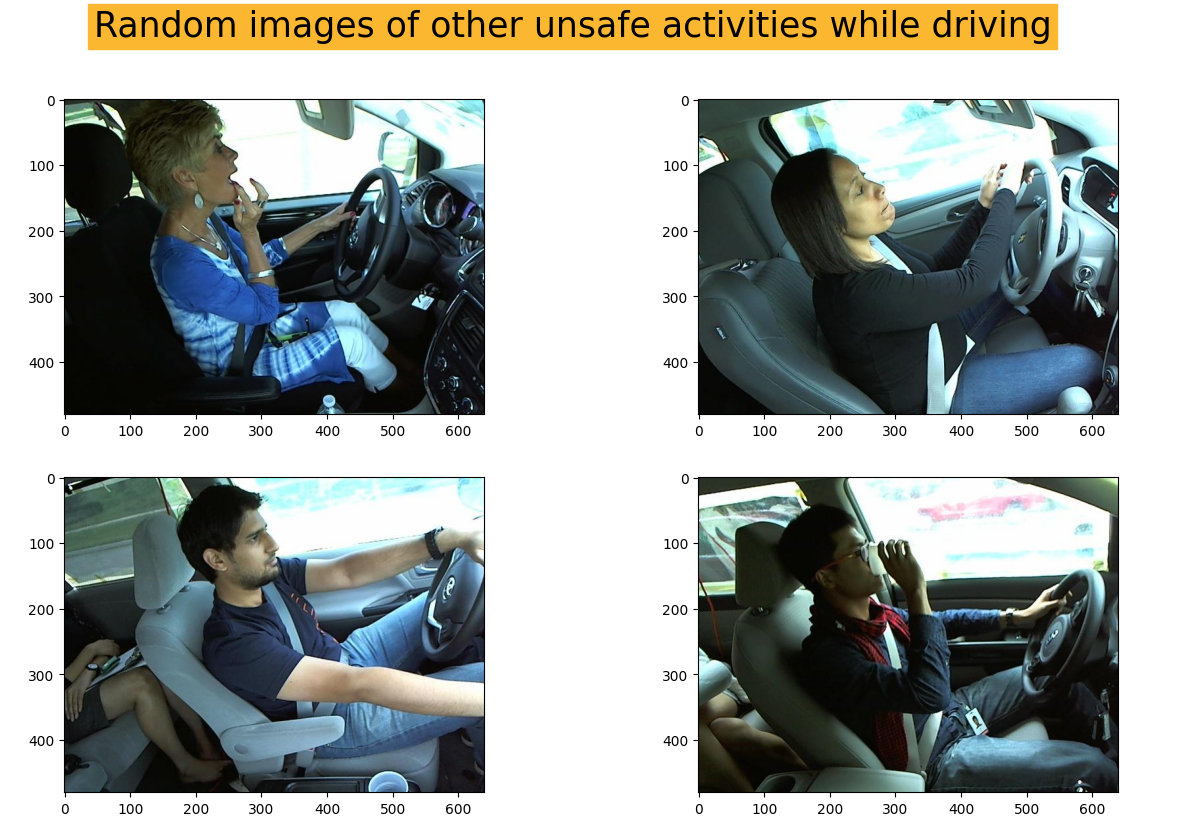

In [ ]:
plt.figure(1, figsize=(15, 9))
plt.axis('off')
n = 0
for i in range(4):

    n += 1
    random_img = random.choice(other_activities)
    imgs = imread(random_img)
    plt.suptitle("Random images of other unsafe activities while driving", fontsize=25
                 ,backgroundcolor= background_color)
    plt.subplot(2,2,n)
    plt.imshow(imgs)

plt.show()

random images of safe driving

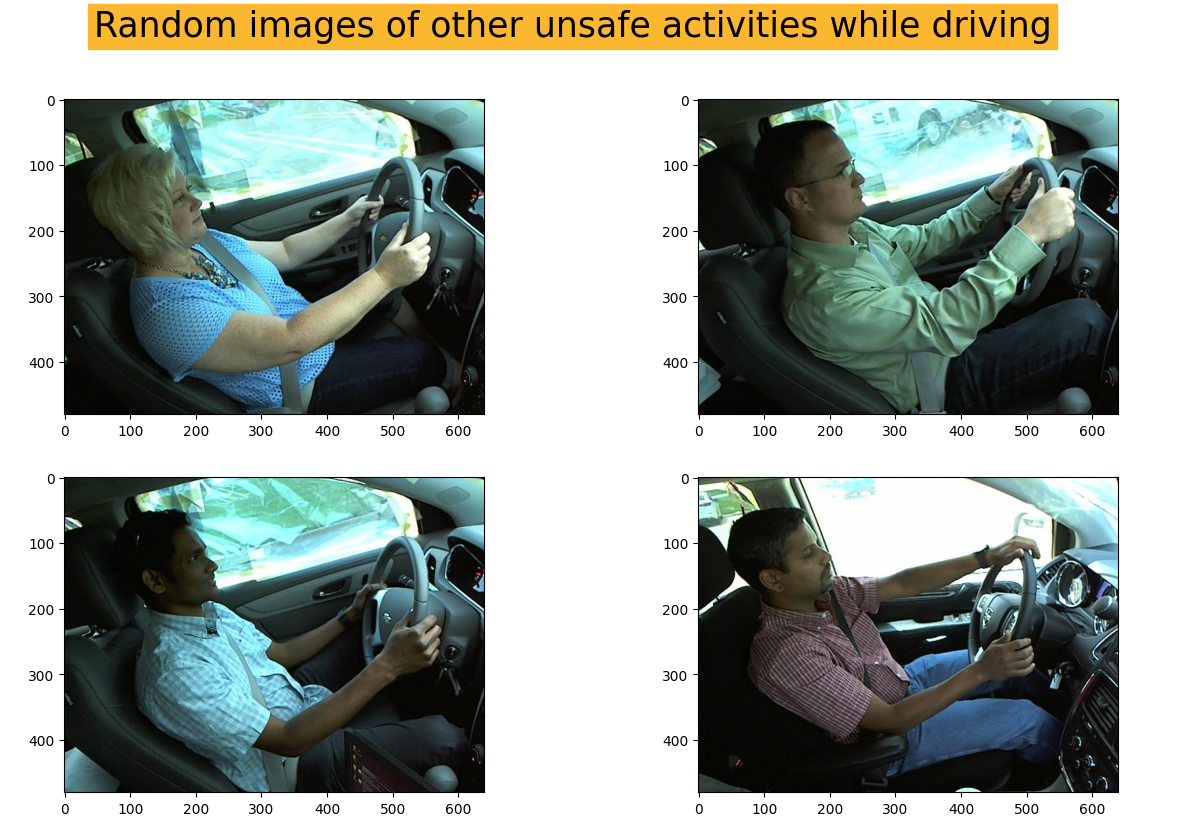

In [ ]:
plt.figure(1, figsize=(15, 9))
plt.axis('off')
n = 0
for i in range(4):

    n += 1
    random_img = random.choice(safe_driving)
    imgs = imread(random_img)
    plt.suptitle("Random images of other unsafe activities while driving", fontsize=25
                 ,backgroundcolor= background_color)
    plt.subplot(2,2,n)
    plt.imshow(imgs)

plt.show()

## Split data to train, test and prediction

In [9]:
print("Number of samples in (Class = Other) = " ,len(other_activities))
print("Number of samples in (Class = Safe Driving) = " ,len(safe_driving))
print("Number of samples in (Class = Talking Phone) = " ,len(talking_phone))
print("Number of samples in (Class = Texting Phone) = " ,len(texting_phone))
print("Number of samples in (Class = Turning) = " ,len(turning))

Number of samples in (Class = Other) =  2119
Number of samples in (Class = Safe Driving) =  2203
Number of samples in (Class = Talking Phone) =  2169
Number of samples in (Class = Texting Phone) =  2203
Number of samples in (Class = Turning) =  2057


finding the number of samples to split

In [10]:
print(.75*len(other_activities) , .2*len(other_activities) ,.05*len(other_activities))
print(.75*len(safe_driving) , .2*len(safe_driving) ,.05*len(safe_driving))
print(.75*len(talking_phone) , .2*len(talking_phone) ,.05*len(talking_phone))
print(.75*len(texting_phone) , .2*len(texting_phone) ,.05*len(texting_phone))
print(.75*len(turning) , .2*len(turning) ,.05*len(turning))

1589.25 423.8 105.95
1652.25 440.6 110.15
1626.75 433.8 108.45
1652.25 440.6 110.15
1542.75 411.40000000000003 102.85000000000001


In [11]:
#Splitting other activities
print("Train","Test","Validation")
train_other = other_activities[:1589]
test_other = other_activities[1589:2012] #1589 + 423 = 2012
valid_other = other_activities[2012:]

print (len(train_other), len(test_other), len(valid_other))

#Splitting safe driving
train_safe = safe_driving[:1652]
test_safe = safe_driving[1652:2092] #1652 + 440 = 2092
valid_safe = safe_driving[2092:]

print (len(train_safe), len(test_safe), len(valid_safe))

#Splitting talking phone
train_talking = talking_phone[:1626]
test_talking = talking_phone[1626:2059] #1626 + 433 = 2059
valid_talking = talking_phone[2059:]

print(len(train_talking),len(test_talking),len(valid_talking))

#Splitting texting phone
train_texting = texting_phone[:1652]
test_texting = texting_phone[1652:2092] #1652 + 440 = 2059
valid_texting = texting_phone[2092:]

print(len(train_texting),len(test_texting),len(valid_texting))

#Splitting turning
train_turn = turning[:1547]
test_turn = turning[1547:1958] #1547 + 411 = 1958
valid_turn = turning[1958:]

print(len(train_turn),len(test_turn),len(valid_turn))

Train Test Validation
1589 423 107
1652 440 111
1626 433 110
1652 440 111
1547 411 99


Creating dataframes

In [12]:
train_other_df = pd.DataFrame({'image':train_other,'label':'Other'})
train_safe_df = pd.DataFrame({'image':train_safe,'label':'Safe'})
train_talking_df = pd.DataFrame({'image':train_talking,'label':'Talking'})
train_texting_df = pd.DataFrame({'image':train_texting,'label':'Texting'})
train_turn_df = pd.DataFrame({'image':train_turn,'label':'Turn'})

test_other_df = pd.DataFrame({'image':test_other,'label':'Other'})
test_safe_df = pd.DataFrame({'image':test_safe,'label':'Safe'})
test_talking_df = pd.DataFrame({'image':test_talking,'label':'Talking'})
test_texting_df = pd.DataFrame({'image':test_texting,'label':'Texting'})
test_turn_df = pd.DataFrame({'image':test_turn,'label':'Turn'})

valid_other_df = pd.DataFrame({'image':valid_other,'label':'Other'})
valid_safe_df = pd.DataFrame({'image':valid_safe,'label':'Safe'})
valid_talking_df = pd.DataFrame({'image':valid_talking,'label':'Talking'})
valid_texting_df = pd.DataFrame({'image':valid_texting,'label':'Texting'})
valid_turn_df = pd.DataFrame({'image':valid_turn,'label':'Turn'})

In [13]:
train_df = pd.concat([train_other_df, train_safe_df, train_talking_df, train_texting_df, train_turn_df])
test_df = pd.concat([test_other_df, test_safe_df, test_talking_df, test_texting_df, test_turn_df])
valid_df = pd.concat([valid_other_df, valid_safe_df, valid_talking_df, valid_texting_df, valid_turn_df])

In [ ]:
print("Number of rows in train dataframe is: ", len(train_df))
print("Number of rows in test dataframe is: ", len(test_df))
print("Number of rows in val dataframe is: ", len(valid_df))

Number of rows in train dataframe is:  8066
Number of rows in test dataframe is:  2147
Number of rows in val dataframe is:  538


Rescale images

In [14]:
random_img_height = random.choice(train_other)

In [15]:
image = cv2.imread(random_img_height)
height, width = image.shape[:2]
print(height,width)

480 640


In [16]:
Batch_size = 64
Img_height = 240
Img_width = 240

In [17]:
trainGenerator = ImageDataGenerator(rescale=1./255.)
validGenerator = ImageDataGenerator(rescale=1./255.)
testGenerator = ImageDataGenerator(rescale=1./255.)

In [18]:
trainDataset = trainGenerator.flow_from_dataframe(
  dataframe=train_df,
  class_mode="categorical",
  x_col="image",
  y_col="label",
  batch_size=Batch_size,
  seed=42,
  shuffle=True,
  target_size=(Img_height,Img_width) #set the height and width of the images
)

testDataset = testGenerator.flow_from_dataframe(
  dataframe=test_df,
  class_mode='categorical',
  x_col="image",
  y_col="label",
  batch_size=Batch_size,
  seed=42,
  shuffle=True,
  target_size=(Img_height,Img_width)
)

validDataset = validGenerator.flow_from_dataframe(
  dataframe=valid_df,
  class_mode='categorical',
  x_col="image",
  y_col="label",
  batch_size=Batch_size,
  seed=42,
  shuffle=True,
  target_size=(Img_height,Img_width)
)



Found 8066 validated image filenames belonging to 5 classes.
Found 2147 validated image filenames belonging to 5 classes.
Found 538 validated image filenames belonging to 5 classes.


# AlexNet

a Convulutional neural network (CNN) architecture that is used primarly for image recognition and classification tasks. The Network contains 8 layers.

In [ ]:
#defining the Network
def AlexNet():
  inp = layers.Input((240, 240, 3))
  x = layers.Conv2D(96, 11, 4, activation='relu')(inp)
  x = layers.BatchNormalization()(x)
  x = layers.MaxPooling2D(3, 2)(x)
  x = layers.Conv2D(256, 5, 1, activation='relu')(x)
  x = layers.BatchNormalization()(x)
  x = layers.MaxPooling2D(3, 2)(x)
  x = layers.Conv2D(384, 3, 1, activation='relu')(x)
  x = layers.Conv2D(384, 3, 1, activation='relu')(x)
  x = layers.Conv2D(256, 3, 1, activation='relu')(x)
  x = layers.MaxPooling2D(3, 2)(x)
  x = layers.Flatten()(x)
  x = layers.Dense(4096, activation='relu')(x)
  x = layers.Dropout(0.5)(x)
  x = layers.Dense(4096, activation='relu')(x)
  x = layers.Dropout(0.5)(x)
  x = layers.Dense(5, activation='softmax')(x)

  #creating the model(inputs,outputs)
  model_Alex = models.Model(inputs = inp, outputs = x)

  return model_Alex

model_Alex = AlexNet()
model_Alex.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 240, 240, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 58, 58, 96)     │        34,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 58, 58, 96)     │           384 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 28, 28, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 24, 24, 256)    │       614,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 24, 24, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 11, 11, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 9, 9, 384)      │       885,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 7, 7, 384)      │     1,327,488 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 5, 5, 256)      │       884,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 2, 2, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 4096)           │     4,198,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 5)              │        20,485 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 24,748,805 (94.41 MB)

 Trainable params: 24,748,101 (94.41 MB)

 Non-trainable params: 704 (2.75 KB)

## Architecture

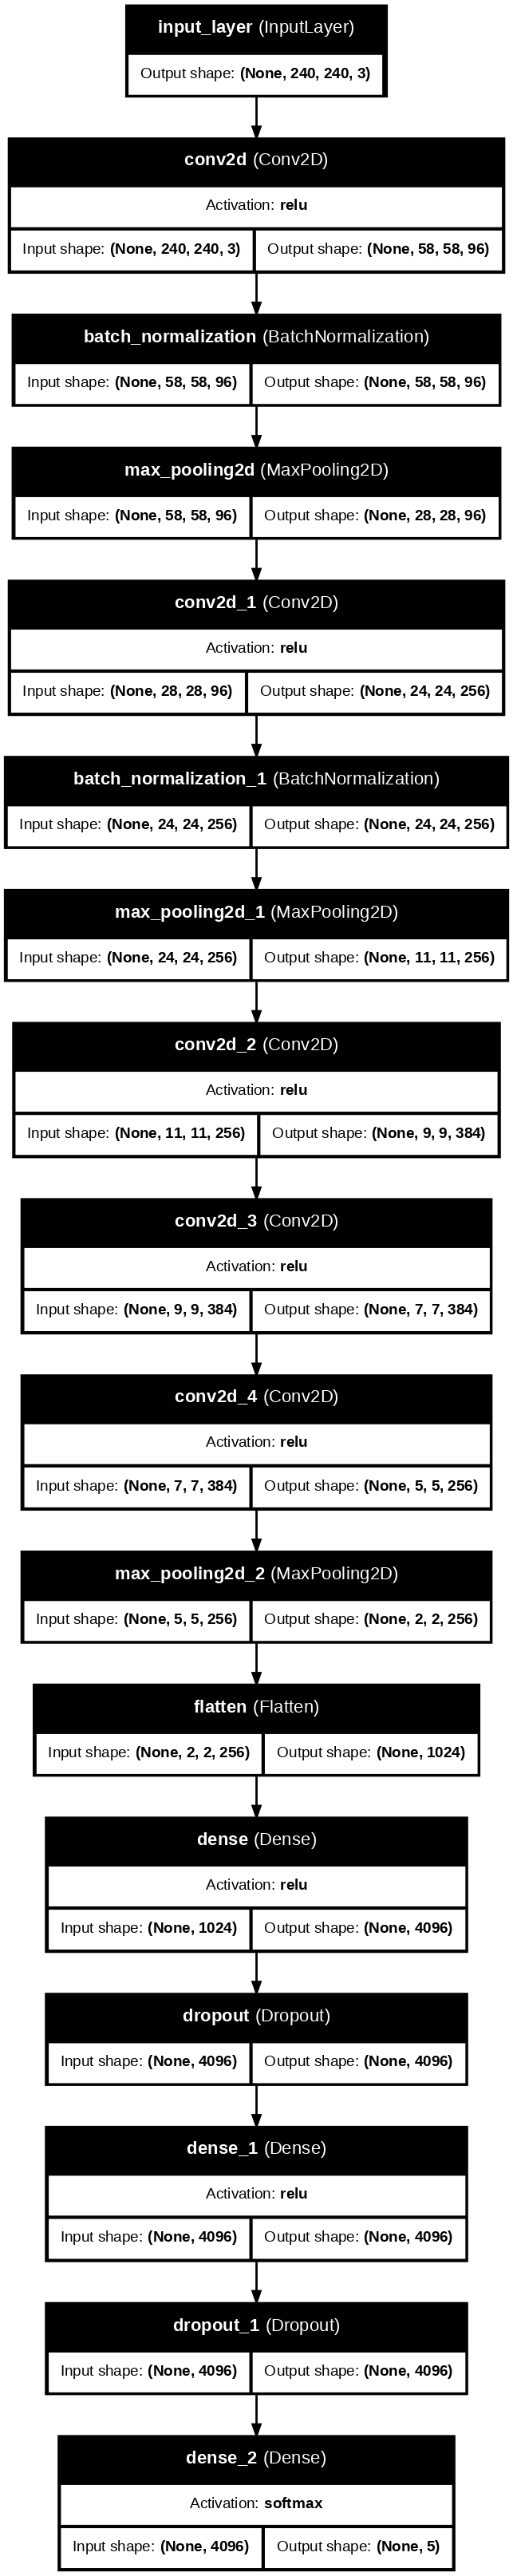

In [ ]:
tf.keras.utils.plot_model(
    model_Alex,
    to_file='alex_model.png',
    show_shapes = True,
    show_dtype=False,
    show_layer_names=True,
    show_layer_activations=True,
    dpi=100
)

In [ ]:
model_Alex.compile(loss=BinaryCrossentropy(),
                   optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

save checkpoints during training

In [ ]:
!pip install pyyaml h5py  # Required to save models in HDF5 format

In [ ]:
checkpoints_path = "/content/drive/MyDrive/Colab Notebooks/checkpoints/cp.weights.h5"
checkpoints_dir = os.path.dirname(checkpoints_path)

## Training

In [ ]:
#Create a callback that saves the models weights
cp_callback = keras.callbacks.ModelCheckpoint(filepath=checkpoints_path,
                                                 save_weights_only = True,
                                                 verbose = 1)
#Train model with the new callback
Alex_model = model_Alex.fit(trainDataset,
                            epochs=20,
                            validation_data=validDataset,
                            callbacks=[cp_callback])

Epoch 1/20
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 21s/step - accuracy: 0.3761 - loss: 0.4564 
Epoch 1: saving model to /content/drive/MyDrive/Colab Notebooks/checkpoints/cp.weights.h5
127/127 ━━━━━━━━━━━━━━━━━━━━ 2831s 22s/step - accuracy: 0.3769 - loss: 0.4560 - val_accuracy: 0.3699 - val_loss: 0.5645
Epoch 2/20
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step - accuracy: 0.7189 - loss: 0.2574
Epoch 2: saving model to /content/drive/MyDrive/Colab Notebooks/checkpoints/cp.weights.h5
127/127 ━━━━━━━━━━━━━━━━━━━━ 64s 500ms/step - accuracy: 0.7193 - loss: 0.2571 - val_accuracy: 0.7528 - val_loss: 0.3158
Epoch 3/20
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 438ms/step - accuracy: 0.8688 - loss: 0.1425
Epoch 3: saving model to /content/drive/MyDrive/Colab Notebooks/checkpoints/cp.weights.h5
127/127 ━━━━━━━━━━━━━━━━━━━━ 64s 502ms/step - accuracy: 0.8690 - loss: 0.1424 - val_accuracy: 0.7937 - val_loss: 0.2286
Epoch 4/20
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step - accuracy: 0.9244 - loss: 0.0888
Epoch 4: saving mod

In [ ]:
model_Alex.load_weights(checkpoints_path)

## Testing model accuracy
testing the accuracy of the model using test dataset

In [ ]:
loss, acc = model_Alex.evaluate(testDataset, verbose=1)
print("Restored model, accuracy: {:5.2f}%".format(100 * acc))

34/34 ━━━━━━━━━━━━━━━━━━━━ 1604s 47s/step - accuracy: 0.9477 - loss: 0.3517
Restored model, accuracy: 94.32%


In [ ]:
training_loss_alex = Alex_model.history['loss']
valid_loss_alex = Alex_model.history['val_loss']
training_acc_alex = Alex_model.history['accuracy']
valid_acc_alex = Alex_model.history['val_accuracy']

NameError: name 'Alex_model' is not defined

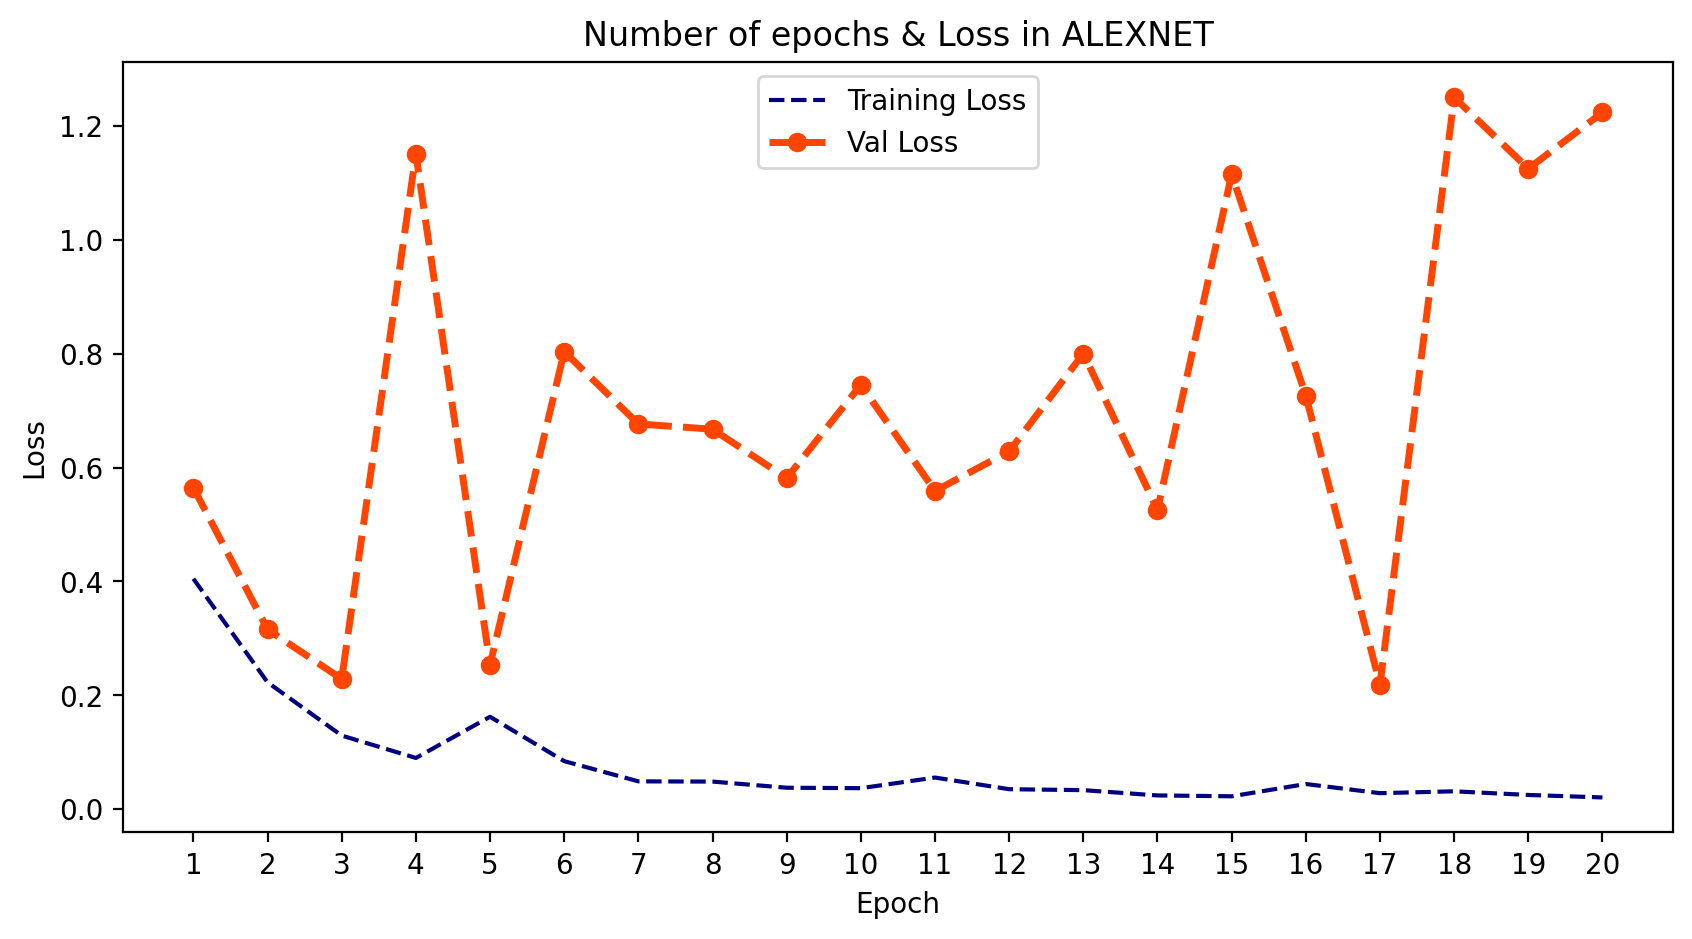

In [ ]:
epoch_count = range(1, len(training_loss_alex) + 1)

# Visualize loss history
plt.figure(figsize=(10,5), dpi=200)
plt.plot(epoch_count, training_loss_alex, 'r--', color= 'navy')
plt.plot(epoch_count, valid_loss_alex, '--bo',color= 'orangered', linewidth = '2.5', label='line with marker')
plt.legend(['Training Loss', 'Val Loss'])
plt.title('Number of epochs & Loss in ALEXNET')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.xticks(np.arange(1,21,1))
plt.show();

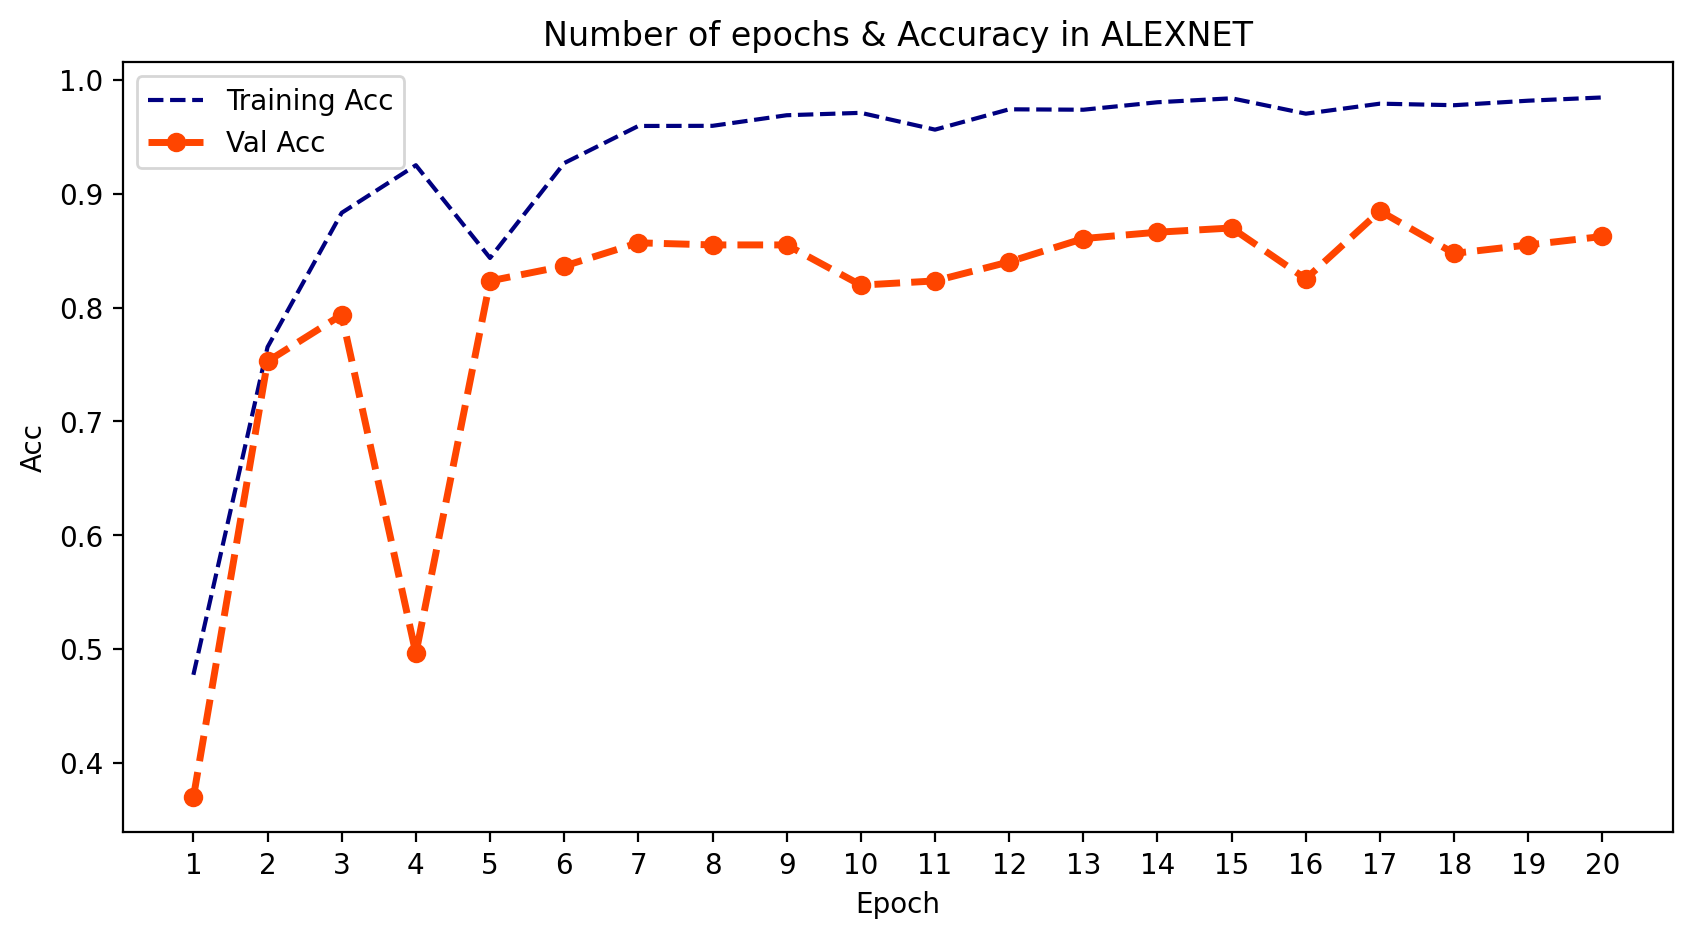

In [ ]:
plt.figure(figsize=(10,5), dpi=200)
plt.plot(epoch_count, training_acc_alex, 'r--', color= 'navy')
plt.plot(epoch_count, valid_acc_alex, '--bo',color= 'orangered', linewidth = '2.5', label='line with marker')
plt.legend(['Training Acc', 'Val Acc'])
plt.title('Number of epochs & Accuracy in ALEXNET')
plt.xlabel('Epoch')
plt.ylabel('Acc')
plt.xticks(np.arange(1,21,1))
plt.plot();
plt.show();

## Testing on random img
Testing AlexNet model on random image

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
Predictions: [[8.1181470e-13 2.1404483e-18 1.0000000e+00 2.1017040e-22 2.8355836e-15]]
Predicted class index: 2
Predicted class: Talking with probability 1.00


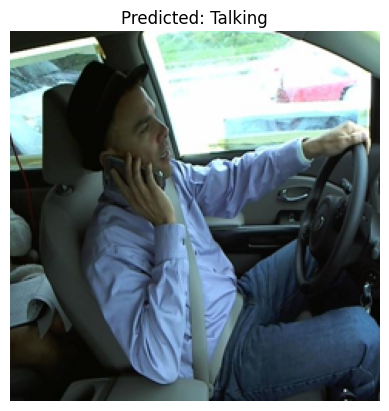

In [ ]:
# Choose an image for prediction (e.g., the first image from the 'other_activities' test set)
image_path = '/content/drive/MyDrive/Revitsone-5classes/talking_phone/img_10324.jpg'

# Load the image
img = Image.open(image_path)

# Resize the image to match the model's input size
img = img.resize((Img_width, Img_height))

# Convert the image to a NumPy array
img_array = np.array(img)

# Normalize the image pixels (rescale from 0-255 to 0-1)
img_array = img_array / 255.0

# Add a batch dimension (model expects a batch of images)
img_array = np.expand_dims(img_array, axis=0)

# Get predictions from the model
predictions = model_Alex.predict(img_array)

# The model outputs probabilities for each class. Find the class with the highest probability.
predicted_class_index = np.argmax(predictions)
predicted_class_probability = np.max(predictions)

# Get the class labels from your ImageDataGenerator (they are in alphabetical order by default)
# You might need to adjust this if your labels were ordered differently
class_labels = sorted(trainDataset.class_indices.keys())
predicted_class_label = class_labels[predicted_class_index]

print(f"Predictions: {predictions}")
print(f"Predicted class index: {predicted_class_index}")
print(f"Predicted class: {predicted_class_label} with probability {predicted_class_probability:.2f}")

# Optionally, display the image
plt.imshow(img)
plt.title(f"Predicted: {predicted_class_label}")
plt.axis('off')
plt.show()

## Reading Video Frames
I want to read videos using opencv and turn them into frames that i can input into the model


# VGGNet Model

In [ ]:
def VGGNet():
    inp = layers.Input((240, 240, 3))
    x = layers.Conv2D(64, 3, 1, activation='relu')(inp)
    x = layers.Conv2D(64, 3, 1, activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D(2, 2)(x)
    x = layers.Conv2D(128, 3, 1, activation='relu')(x)
    x = layers.Conv2D(128, 3, 1, activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D(2, 2)(x)
    x = layers.Conv2D(256, 3, 1, activation='relu')(x)
    x = layers.Conv2D(256, 3, 1, activation='relu')(x)
    x = layers.Conv2D(256, 3, 1, activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D(2, 2)(x)
    x = layers.Conv2D(512, 3, 1, activation='relu')(x)
    x = layers.Conv2D(512, 3, 1, activation='relu')(x)
    x = layers.Conv2D(512, 3, 1, activation='relu')(x)
    x = layers.MaxPooling2D(2, 2)(x)
    x = layers.Flatten()(x)
    x = layers.Dense(4096, activation='relu')(x)
    x = layers.Dropout(0.5)(x)
    x = layers.Dense(4096, activation='relu')(x)
    x = layers.Dropout(0.5)(x)
    x = layers.Dense(5, activation='softmax')(x)

    model_VGG = models.Model(inputs=inp, outputs=x)

    return model_VGG

model_VGG = VGGNet()
model_VGG.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 240, 240, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 238, 238, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 236, 236, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 236, 236, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 118, 118, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 116, 116, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 114, 114, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 114, 114, 128)  │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 57, 57, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 55, 55, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 53, 53, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 51, 51, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 51, 51, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 25, 25, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 23, 23, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 21, 21, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 19, 19, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 9, 9, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 41472)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4096)           │   169,873,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 194,312,261 (741.24 MB)

 Trainable params: 194,311,365 (741.24 MB)

 Non-trainable params: 896 (3.50 KB)

## Architecture

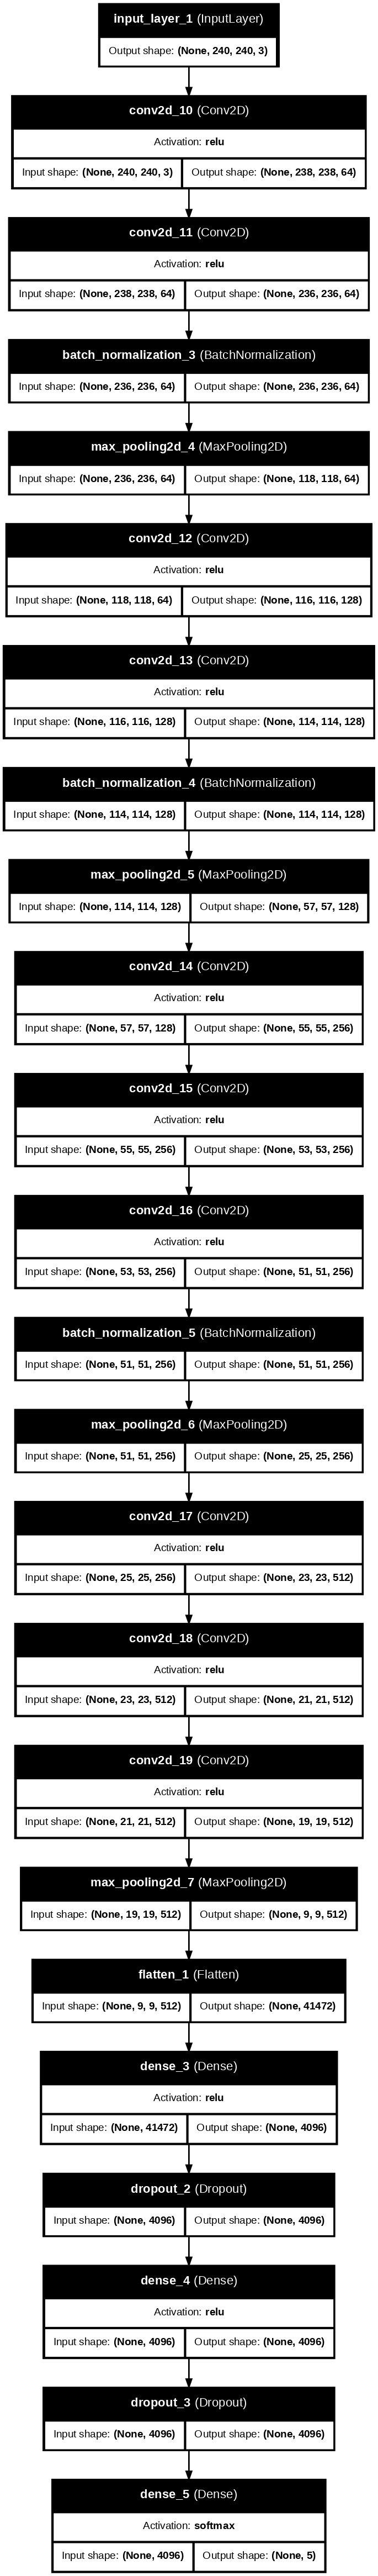

In [ ]:
#shows all the 19 layers of the model
tf.keras.utils.plot_model(
    model_VGG,
    to_file='vgg_model.png',
    show_shapes=True,
    show_dtype=False,
    show_layer_names=True,
    show_layer_activations=True,
    dpi=100
)

In [ ]:
model_VGG.compile(loss=BinaryCrossentropy(),
              optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

create path for checkpoints

In [ ]:
checkpoints_path_VGG="/content/drive/MyDrive/Colab Notebooks/checkpoints/cpVGG.weights.h5"
checkpoints_VGG_dir = os.path.dirname(checkpoints_path_VGG)

## Training

In [ ]:
#Create a callback that saves the models weights
cp_callback = keras.callbacks.ModelCheckpoint(filepath=checkpoints_path_VGG,
                                                 save_weights_only = True,
                                                 verbose = 1)
#Train model with the new callback
VGGNet = model_VGG.fit(trainDataset,
                            epochs=20,
                            validation_data=validDataset,
                            callbacks=[cp_callback])

Epoch 1/20
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 24s/step - accuracy: 0.3409 - loss: 5.7341 
Epoch 1: saving model to /content/drive/MyDrive/Colab Notebooks/checkpoints/cpVGG.weights.h5
127/127 ━━━━━━━━━━━━━━━━━━━━ 3430s 26s/step - accuracy: 0.3422 - loss: 5.7015 - val_accuracy: 0.2138 - val_loss: 0.5623
Epoch 2/20
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 920ms/step - accuracy: 0.8492 - loss: 0.1622
Epoch 2: saving model to /content/drive/MyDrive/Colab Notebooks/checkpoints/cpVGG.weights.h5
127/127 ━━━━━━━━━━━━━━━━━━━━ 146s 1s/step - accuracy: 0.8494 - loss: 0.1621 - val_accuracy: 0.1914 - val_loss: 0.8944
Epoch 3/20
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9241 - loss: 0.0839
Epoch 3: saving model to /content/drive/MyDrive/Colab Notebooks/checkpoints/cpVGG.weights.h5
127/127 ━━━━━━━━━━━━━━━━━━━━ 212s 2s/step - accuracy: 0.9241 - loss: 0.0838 - val_accuracy: 0.4033 - val_loss: 0.6487
Epoch 4/20
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9615 - loss: 0.0476
Epoch 4: saving mode

In [ ]:
training_loss_vgg = VGGNet.history['loss']
val_loss_vgg = VGGNet.history['val_loss']
training_acc_vgg = VGGNet.history['accuracy']
val_acc_vgg = VGGNet.history['val_accuracy']

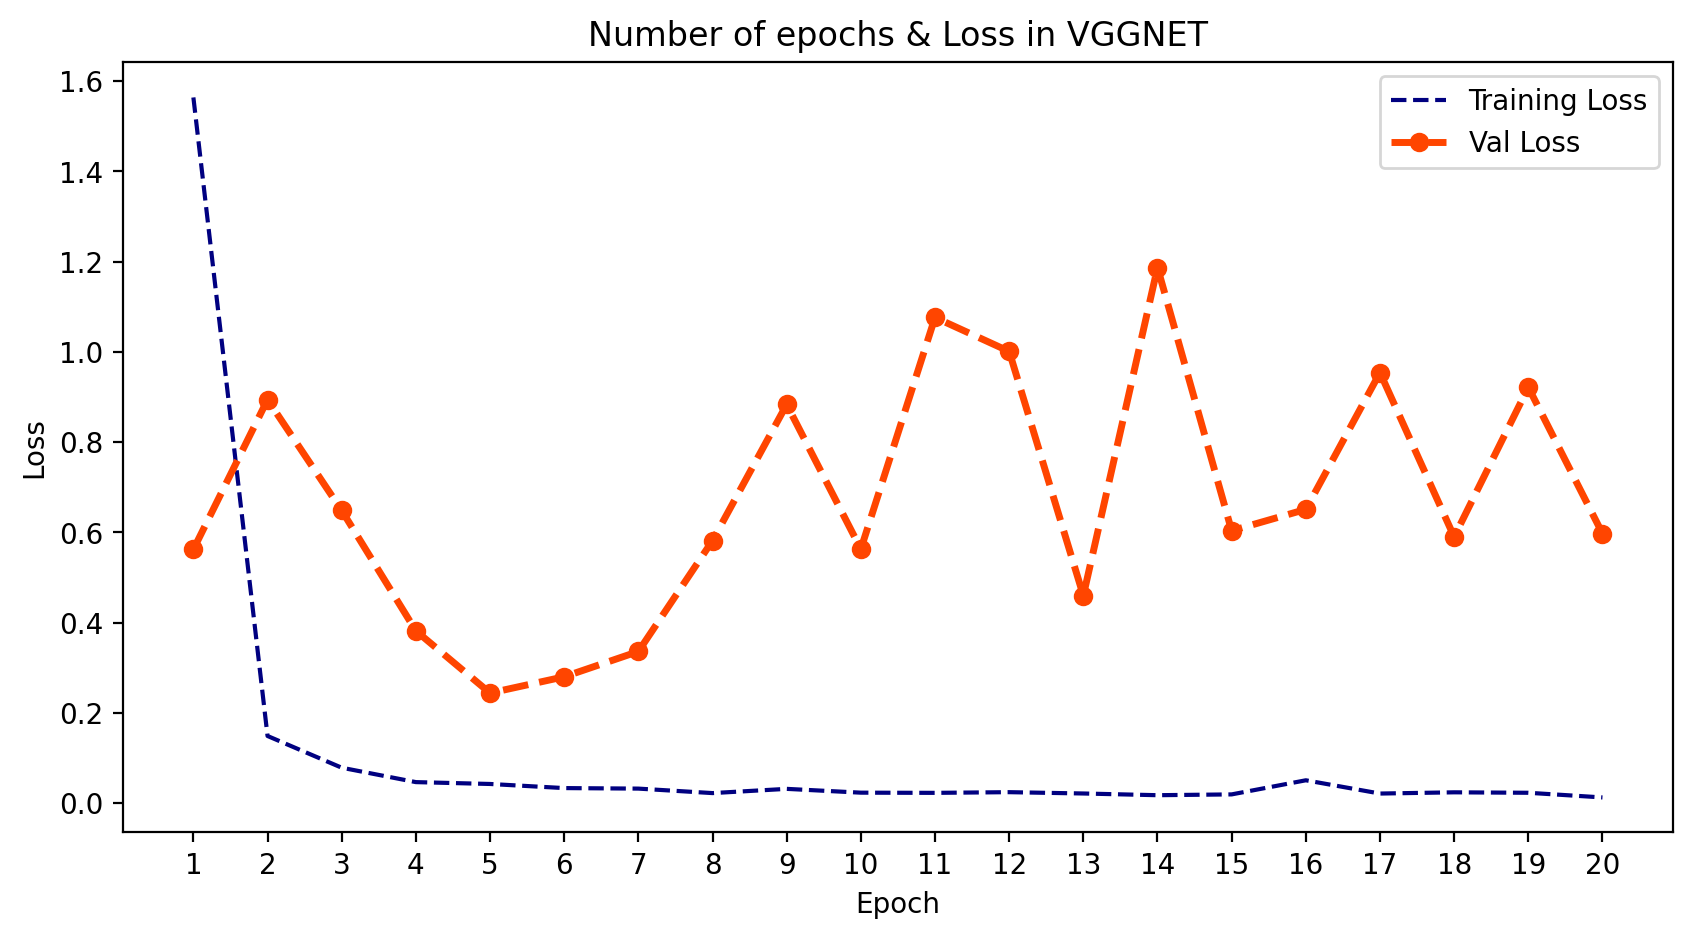

In [ ]:
epoch_count = range(1, len(training_loss_vgg) + 1)

plt.figure(figsize=(10,5), dpi=200)
plt.plot(epoch_count, training_loss_vgg, 'r--', color= 'navy')
plt.plot(epoch_count, val_loss_vgg, '--bo',color= 'orangered', linewidth = '2.5', label='line with marker')
plt.legend(['Training Loss', 'Val Loss'])
plt.title('Number of epochs & Loss in VGGNET')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.xticks(np.arange(1,21,1))
plt.show();

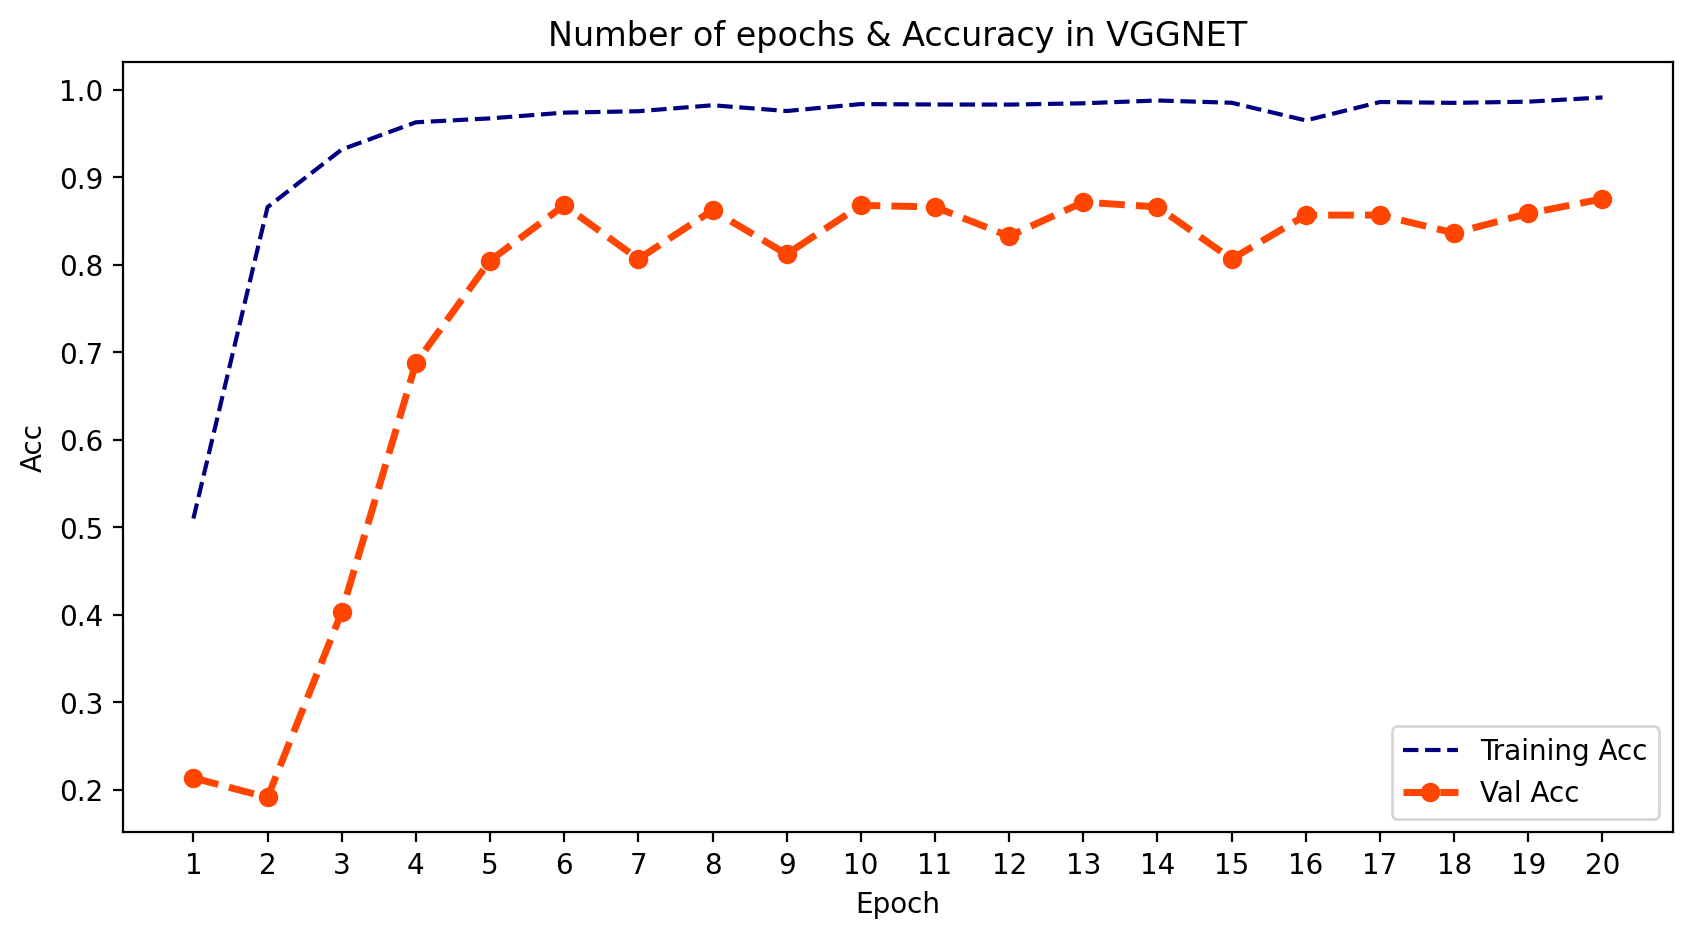

In [ ]:
plt.figure(figsize=(10,5), dpi=200)
plt.plot(epoch_count, training_acc_vgg, 'r--', color= 'navy')
plt.plot(epoch_count, val_acc_vgg, '--bo',color= 'orangered', linewidth = '2.5', label='line with marker')
plt.legend(['Training Acc', 'Val Acc'])
plt.title('Number of epochs & Accuracy in VGGNET')
plt.xlabel('Epoch')
plt.ylabel('Acc')
plt.xticks(np.arange(1,21,1))
plt.plot();
plt.show();

## Testing on random img

In [ ]:
model_VGG.load_weights(checkpoints_path_VGG)

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
Predictions: [[4.6797796e-30 2.9899330e-34 1.0000000e+00 3.8848831e-32 2.3497815e-34]]
Predicted class index: 2
Predicted class: Talking with probability 1.00


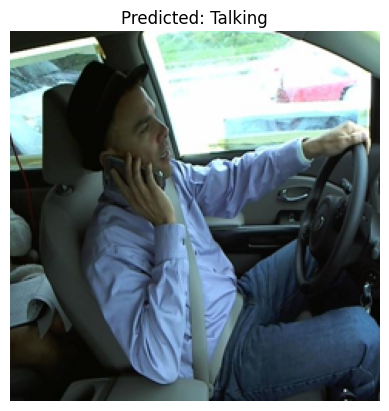

In [ ]:
# Choose an image for prediction (e.g., the first image from the 'other_activities' test set)
image_path = '/content/drive/MyDrive/Revitsone-5classes/talking_phone/img_10324.jpg'

# Load the image
img = Image.open(image_path)

# Resize the image to match the model's input size
img = img.resize((Img_width, Img_height))

# Convert the image to a NumPy array
img_array = np.array(img)

# Normalize the image pixels (rescale from 0-255 to 0-1)
img_array = img_array / 255.0

# Add a batch dimension (model expects a batch of images)
img_array = np.expand_dims(img_array, axis=0)

# Get predictions from the model
predictions = model_VGG.predict(img_array)

# The model outputs probabilities for each class. Find the class with the highest probability.
predicted_class_index = np.argmax(predictions)
predicted_class_probability = np.max(predictions)

# Get the class labels from your ImageDataGenerator (they are in alphabetical order by default)
# You might need to adjust this if your labels were ordered differently
class_labels = sorted(trainDataset.class_indices.keys())
predicted_class_label = class_labels[predicted_class_index]

print(f"Predictions: {predictions}")
print(f"Predicted class index: {predicted_class_index}")
print(f"Predicted class: {predicted_class_label} with probability {predicted_class_probability:.2f}")

# Optionally, display the image
plt.imshow(img)
plt.title(f"Predicted: {predicted_class_label}")
plt.axis('off')
plt.show()

## Testing model accuracy
Testing the accuracy of VGGNet model on test dataset

In [ ]:
loss, acc = model_VGG.evaluate(testDataset, verbose=1)
print("Restored model, accuracy: {:5.2f}%".format(100 * acc))

34/34 ━━━━━━━━━━━━━━━━━━━━ 810s 24s/step - accuracy: 0.9527 - loss: 0.2812
Restored model, accuracy: 95.44%


# ResNet


ResNet 34-layer deep convolutional neural network architecture

In [21]:
def ResNet34 ():
    inp = layers.Input((240, 240, 3))
    x = layers.Conv2D(64, 7, 2,padding='valid', activation='relu')(inp)
    x = layers.MaxPooling2D(strides=2, padding='same')(x)
    x = layers.Conv2D(64, 3, 1,padding='same', activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Conv2D(64, 3, 1,padding='same', activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Conv2D(64, 3, 1,padding='same', activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Conv2D(64, 3, 1,padding='same', activation='relu')(x)
    x = layers.BatchNormalization()(x)


    x = layers.Conv2D(128, 3, 2,padding='same', activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Conv2D(128, 3, 1,padding='same', activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Conv2D(128, 3, 1,padding='same', activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Conv2D(128, 3, 1,padding='same', activation='relu')(x)
    x = layers.BatchNormalization()(x)


    x = layers.Conv2D(256, 3, 2,padding='same', activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Conv2D(256, 3, 1,padding='same', activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Conv2D(256, 3, 1,padding='same', activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Conv2D(256, 3, 1,padding='same', activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Conv2D(256, 3, 1,padding='same', activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Conv2D(256, 3, 1,padding='same', activation='relu')(x)
    x = layers.BatchNormalization()(x)



    x = layers.Conv2D(512, 3, 2,padding='same', activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Conv2D(512, 3, 1,padding='same', activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Conv2D(512, 3, 1,padding='same', activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Flatten()(x)
    x = layers.Dense(4096, activation='relu')(x)
    x = layers.Dropout(0.5)(x)
    x = layers.Dense(4096, activation='relu')(x)
    x = layers.Dropout(0.5)(x)
    x = layers.Dense(5, activation='softmax')(x)




    model_Res = models.Model(inputs=inp, outputs=x)

    return model_Res

model_Res = ResNet34()
model_Res.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 240, 240, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 117, 117, 64)   │         9,472 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 59, 59, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 59, 59, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 59, 59, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 59, 59, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 59, 59, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 59, 59, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 59, 59, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 59, 59, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 59, 59, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 30, 30, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 30, 30, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 30, 30, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 30, 30, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 30, 30, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 30, 30, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 30, 30, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 15, 15, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 15, 15, 256)    │         1,02

 Total params: 160,858,117 (613.63 MB)

 Trainable params: 160,850,437 (613.60 MB)

 Non-trainable params: 7,680 (30.00 KB)

## Plotting Resnet Model

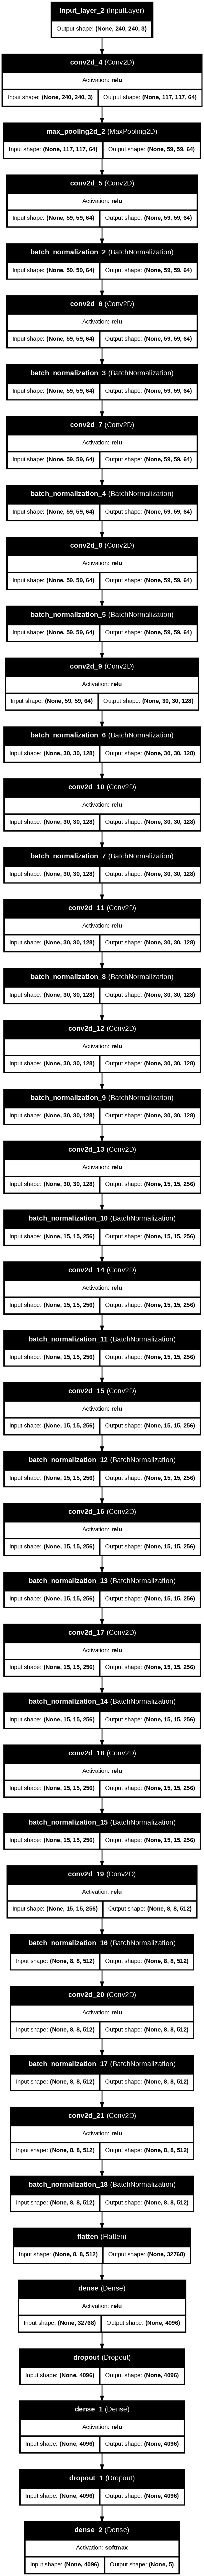

In [27]:
tf.keras.utils.plot_model(
    model_Res,
    to_file='res_model.png',
    show_shapes=True,
    show_dtype=False,
    show_layer_names=True,
    show_layer_activations=True,
    dpi=100
)

In [26]:
model_Res.compile(loss=BinaryCrossentropy(),
              optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

In [22]:
checkpoints_path_Res="/content/drive/MyDrive/Colab Notebooks/checkpoints/cpRes.weights.h5"
checkpoints_Res_dir = os.path.dirname(checkpoints_path_Res)

In [ ]:
#Create a callback that saves the models weights
cp_callback = keras.callbacks.ModelCheckpoint(filepath=checkpoints_path_Res,
                                                 save_weights_only = True,
                                                 verbose = 1)
#Train model with the new callback
Res_model = model_Res.fit(trainDataset,
                            epochs=20,
                            validation_data=validDataset,
                            callbacks=[cp_callback])

Res_model = model_Res.fit(trainDataset, epochs=20, validation_data=valDataset)

Epoch 1/20
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 22s/step - accuracy: 0.2767 - loss: 1.2247 
Epoch 1: saving model to /content/drive/MyDrive/Colab Notebooks/checkpoints/cpRes.weights.h5
127/127 ━━━━━━━━━━━━━━━━━━━━ 3061s 24s/step - accuracy: 0.2771 - loss: 1.2207 - val_accuracy: 0.2323 - val_loss: 2.4320
Epoch 2/20
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 808ms/step - accuracy: 0.3380 - loss: 0.4739
Epoch 2: saving model to /content/drive/MyDrive/Colab Notebooks/checkpoints/cpRes.weights.h5
127/127 ━━━━━━━━━━━━━━━━━━━━ 124s 978ms/step - accuracy: 0.3379 - loss: 0.4738 - val_accuracy: 0.1877 - val_loss: 4.9949
Epoch 3/20
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 818ms/step - accuracy: 0.3233 - loss: 0.4482
Epoch 3: saving model to /content/drive/MyDrive/Colab Notebooks/checkpoints/cpRes.weights.h5
127/127 ━━━━━━━━━━━━━━━━━━━━ 130s 1s/step - accuracy: 0.3233 - loss: 0.4483 - val_accuracy: 0.3532 - val_loss: 5.2970
Epoch 4/20
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 763ms/step - accuracy: 0.3399 - loss: 0.4280
Epoch 4: sa

In [28]:
model_Res.load_weights(checkpoints_path_Res)

In [29]:
loss, acc = model_Res.evaluate(testDataset, verbose=1)
print("Restored model, accuracy: {:5.2f}%".format(100 * acc))

34/34 ━━━━━━━━━━━━━━━━━━━━ 628s 18s/step - accuracy: 0.3345 - loss: 0.6722
Restored model, accuracy: 33.16%
